In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
mask_df = pd.read_csv('data/term_landseamask.csv', sep=';')

In [95]:
mask_df

,id,i,j,lon,lat,index,olim
0,1,2,361,-179.75,89.75,-999,0
1,2,2,360,-179.75,89.25,-999,0
2,3,2,359,-179.75,88.75,-999,0
3,4,2,358,-179.75,88.25,-999,0
4,5,2,357,-179.75,87.75,-999,0
...,...,...,...,...,...,...,...
259195,259196,721,6,179.75,-87.75,-999,2
259196,259197,721,5,179.75,-88.25,-999,2
259197,259198,721,4,179.75,-88.75,-999,2
259198,259199,721,3,179.75,-89.25,-999,2


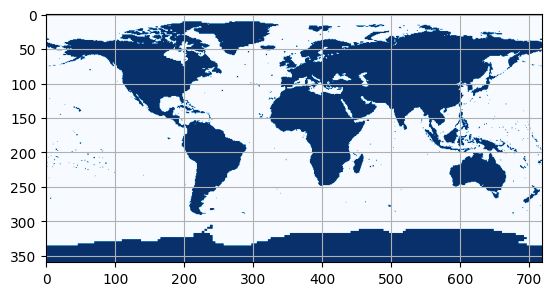

In [126]:
mask = np.array(mask_df['olim']).reshape(720, 360).T
mask[mask == 2] = 1
plt.imshow(mask, cmap='Blues')
plt.grid()

In [146]:
def calculate_sums(mask, x_ticks, y_ticks):
    max_sum = 0
    for i in range(len(y_ticks) - 1):
        for j in range(len(x_ticks) - 1):
            rectangle = mask[y_ticks[i]:y_ticks[i+1], x_ticks[j]:x_ticks[j+1]]
            
            rectangle_sum = np.sum(rectangle)
            max_sum = max(rectangle_sum, max_sum)
    return max_sum

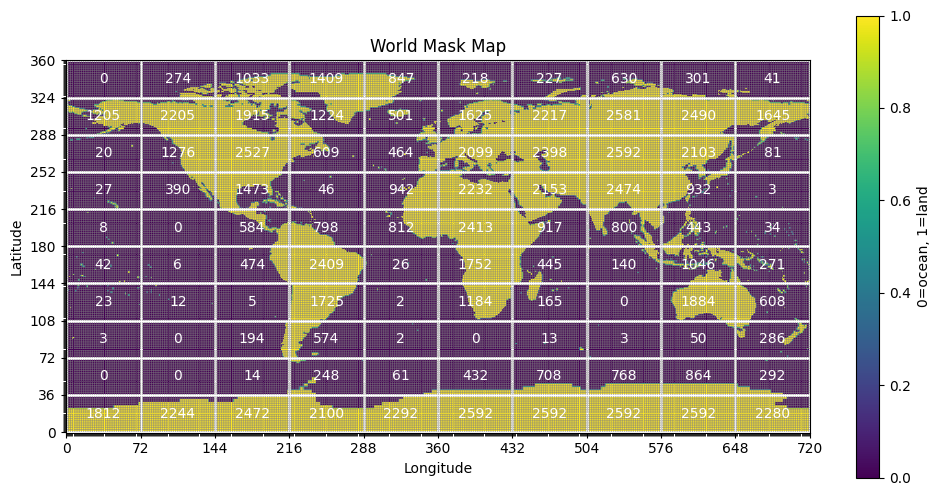

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_world_mask(mask, n=10, m=10, ni=None, mi=None):
    mask = mask[::-1]
    
    fig, ax = plt.subplots(figsize=(12, 6))

    c = ax.imshow(mask, origin='lower', cmap='viridis')
    
    cbar = fig.colorbar(c, ax=ax, orientation='vertical')
    cbar.set_label('0=ocean, 1=land')
    
    x_ticks = [(mask.shape[1] // n) * i for i in range(n + 1)] if ni is None else ni
    y_ticks = [(mask.shape[0] // m) * i for i in range(m + 1)] if mi is None else mi
    ax.set_xticks(x_ticks, minor=False)
    ax.set_yticks(y_ticks, minor=False)
    ax.grid(which='major', color='white', linestyle='-', linewidth=2)
    

    for i in range(len(y_ticks) - 1):
        for j in range(len(x_ticks) - 1):
            rectangle = mask[y_ticks[i]:y_ticks[i+1], x_ticks[j]:x_ticks[j+1]]
            
            rectangle_sum = np.sum(rectangle)
            lon_center = x_ticks[j] + (x_ticks[j+1] - x_ticks[j]) // 2
            lat_center = y_ticks[i] + (y_ticks[i+1] - y_ticks[i]) // 2 
            ax.text(lon_center, lat_center, str(rectangle_sum), color='white', ha='center', va='center')

    ax.set_xticks(np.arange(0, 720, 1), minor=True)
    ax.set_yticks(np.arange(0, 360, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('World Mask Map')

    plt.savefig('mask_map.jpg')

plot_world_mask(mask)


In [149]:
n = 14
m = 7
x_ticks = [(mask.shape[1] // n) * i for i in range(n + 1)]
y_ticks = [(mask.shape[0] // m) * i for i in range(m + 1)]

calculate_sums(mask, x_ticks, y_ticks)

2601